In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from ast import literal_eval
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# csv에서 파일 가져오는 코드
# data_gender = pd.read_csv('./데이터전처리/mediaLikeAge_Gender.csv', encoding='cp949', low_memory=False)
# data_gender
# data_gender.shape
# tfidf_vector = TfidfVectorizer()
# tfidf_matrix = tfidf_vector.fit_transform(data_gender['gender'] + " " + data_gender['age']).toarray()
# tfidf_matrix_feature = tfidf_vector.get_feature_names()

In [3]:
data_gender = pd.read_csv('./데이터전처리/mediaLikeGender.csv', encoding='cp949', low_memory=False, keep_default_na=False)
data_age = pd.read_csv('./데이터전처리/mediaLikeAge.csv', encoding='cp949', low_memory=False, keep_default_na=False)
data_gender.head()

,id,gender,total,mediaType_id,mediaSub_id
0,1,0,917.988,1,
1,2,0,956.406,2,
2,3,0,2034.132,3,
3,4,0,212.310,4,
4,5,0,1761.162,5,


In [4]:
data_age.head()

,id,age,total,mediaType_id,mediaSub_id
0,1,10,202.230,1,
1,2,20,365.400,1,
2,3,30,332.688,1,
3,4,40,399.249,1,
4,5,50,482.904,1,


In [5]:
for _, item in data_age.iterrows():
    # 'mediaSub_id' 열의 NaN 값을 '0'으로 대체
    if pd.isna(item['mediaSub_id']):
        item['mediaSub_id'] = 0

for _, item in data_gender.iterrows():
    # 'mediaSub_id' 열의 NaN 값을 '0'으로 대체
    if pd.isna(item['mediaSub_id']):
        item['mediaSub_id'] = 0
        
data_age.head()

,id,age,total,mediaType_id,mediaSub_id
0,1,10,202.230,1,
1,2,20,365.400,1,
2,3,30,332.688,1,
3,4,40,399.249,1,
4,5,50,482.904,1,


In [6]:
# 두 개의 파일은 mediaType_id, mediuSub_id로 연결할 수 있음
user_age_gender = pd.merge(data_gender, data_age, on=["mediaType_id","mediaSub_id"])
user_age_gender

,id_x,gender,total_x,mediaType_id,mediaSub_id,id_y,age,total_y
0,1,0,917.988,1,,1,10,202.230
1,1,0,917.988,1,,2,20,365.400
2,1,0,917.988,1,,3,30,332.688
3,1,0,917.988,1,,4,40,399.249
4,1,0,917.988,1,,5,50,482.904
...,...,...,...,...,...,...,...,...
75,16,1,892.078,6,3,36,10,133.056
76,16,1,892.078,6,3,37,20,294.000
77,16,1,892.078,6,3,38,30,311.895
78,16,1,892.078,6,3,39,40,382.509


In [7]:
# pivot 테이블
# value에는 rating 값을 cloumn에
user_mediaType_total = user_age_gender.pivot_table(
    index = ["mediaType_id","mediaSub_id"],
    columns = ["gender","age"],
    values = ["total_x","total_y"]).fillna(0)
user_mediaType_total

# total_x : 성별 호감도, total_y : 연령 호감도

total_x                                          \
gender                           0                                           
age                             10        20        30        40        50   
mediaType_id mediaSub_id                                                     
1                          917.988   917.988   917.988   917.988   917.988   
2                          956.406   956.406   956.406   956.406   956.406   
3                         2034.132  2034.132  2034.132  2034.132  2034.132   
4                          212.310   212.310   212.310   212.310   212.310   
5                         1761.162  1761.162  1761.162  1761.162  1761.162   
6            1             709.722   709.722   709.722   709.722   709.722   
             2             709.722   709.722   709.722   709.722   709.722   
             3             877.548   877.548   877.548   877.548   877.548   

                                                                            \
gender                           1                                           
age                             10        20        30        40        50   
mediaType_id mediaSub_id                                                     
1                          864.386   864.386   864.386   864.386   864.386   
2                          899.990   899.990   899.990   899.990   899.990   
3                         2051.186  2051.186  2051.186  2051.186  2051.186   
4                          189.888   189.888   189.888   189.888   189.888   
5                         1863.276  1863.276  1863.276  1863.276  1863.276   
6            1             719.992   719.992   719.992   719.992   719.992   
             2             719.992   719.992   719.992   719.992   719.992   
             3             892.078   892.078   892.078   892.078   892.078   

                          total_y                                              \
gender                          0                                           1   
age                            10     20       30       40        50       10   
mediaType_id mediaSub_id                                                        
1                         202.230  365.4  332.688  399.249   482.904  202.230   
2                         243.432  452.9  386.463  383.346   391.248  243.432   
3                         381.402  734.3  716.283  864.621  1389.888  381.402   
4                          38.934   56.0   68.115   96.255   143.640   38.934   
5                         317.142  627.2  587.940  789.291  1303.704  317.142   
6            1            133.056  235.9  243.063  297.972   518.472  133.056   
             2            133.056  235.9  243.063  297.972   518.472  133.056   
             3            133.056  294.0  311.895  382.509   647.064  133.056   

                                                             
gender                                                       
age                          20       30       40        50  
mediaType_id mediaSub_id                                     
1                         365.4  332.688  399.249   482.904  
2                         452.9  386.463  383.346   391.248  
3                         734.3  716.283  864.621  1389.888  
4                          56.0   68.115   96.255   143.640  
5                         627.2  587.940  789.291  1303.704  
6            1            235.9  243.063  297.972   518.472  
             2            235.9  243.063  297.972   518.472  
             3            294.0  311.895  382.509   647.064

In [8]:
mediaType_user_total = user_mediaType_total.values.T
mediaType_user_total.shape  # (20, 8)

(20, 8)

In [9]:
type(mediaType_user_total)  # numpy.ndarray

numpy.ndarray

In [10]:
# SVD 사용
SVD = TruncatedSVD(n_components=8)
matrix = SVD.fit_transform(mediaType_user_total)
matrix.shape

(20, 8)

In [11]:
matrix[0]

array([ 3.28834726e+03, -7.25596673e+01, -2.96482523e+01,  1.51491579e+00,
        1.20197083e+00,  4.90749707e-01, -1.26411008e-01,  1.08822082e-14])

In [12]:
# 피어슨 상관계수를 구함

In [13]:
corr = np.corrcoef(matrix)
corr.shape

(20, 20)

<Axes: >

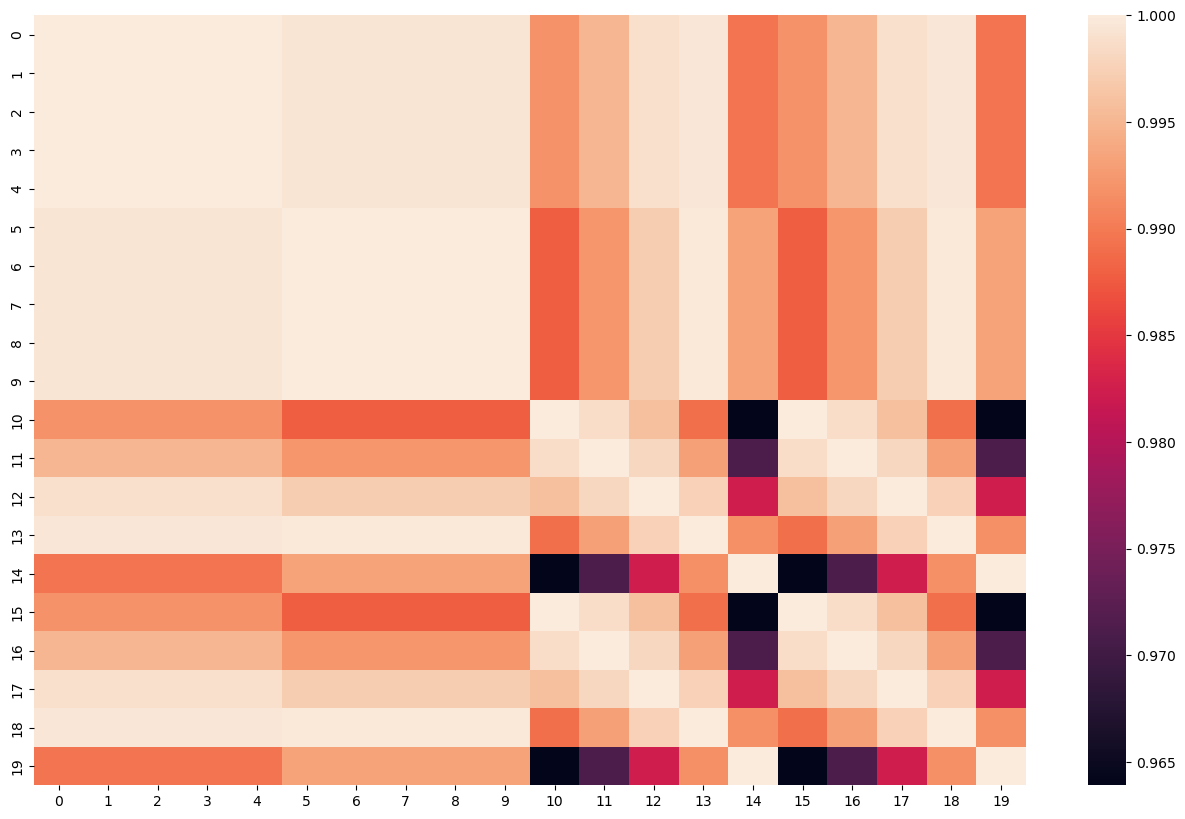

In [14]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr)

In [15]:
mediaType = user_mediaType_total.columns
mediaType_list = list(mediaType)
mediaType_list

[('total_x', 0, 10),
 ('total_x', 0, 20),
 ('total_x', 0, 30),
 ('total_x', 0, 40),
 ('total_x', 0, 50),
 ('total_x', 1, 10),
 ('total_x', 1, 20),
 ('total_x', 1, 30),
 ('total_x', 1, 40),
 ('total_x', 1, 50),
 ('total_y', 0, 10),
 ('total_y', 0, 20),
 ('total_y', 0, 30),
 ('total_y', 0, 40),
 ('total_y', 0, 50),
 ('total_y', 1, 10),
 ('total_y', 1, 20),
 ('total_y', 1, 30),
 ('total_y', 1, 40),
 ('total_y', 1, 50)]

In [16]:
target_tuple = ('total_x', 1, 30)
corr_media = mediaType_list.index(target_tuple)


In [17]:
corr_media_user = corr[corr_media]
corr_media_user

array([0.99938045, 0.99938045, 0.99938045, 0.99938045, 0.99938045,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98775548, 0.99216329, 0.99713218, 0.99958697, 0.99329918,
       0.98775548, 0.99216329, 0.99713218, 0.99958697, 0.99329918])

In [18]:
list(mediaType[(corr_media_user >= 0.9995)])[:10] # 뒤의 숫자 파악해보기

[('total_x', 1, 10),
 ('total_x', 1, 20),
 ('total_x', 1, 30),
 ('total_x', 1, 40),
 ('total_x', 1, 50),
 ('total_y', 0, 40),
 ('total_y', 1, 40)]

In [19]:
# 한 사용자에게 개인 추천을 해주기

In [20]:
df_gender = pd.read_csv('./데이터전처리/mediaLikeGender.csv', encoding='cp949', low_memory=False, keep_default_na=False)
df_age = pd.read_csv('./데이터전처리/mediaLikeAge.csv', encoding='cp949', low_memory=False, keep_default_na=False)

In [21]:
df_user_media_gender = df_gender.pivot(
    index=['mediaType_id', 'mediaSub_id'],
    columns='gender',
    values='total'
).fillna(0)
df_user_media_gender

gender                           0         1
mediaType_id mediaSub_id                    
1                          917.988   864.386
2                          956.406   899.990
3                         2034.132  2051.186
4                          212.310   189.888
5                         1761.162  1863.276
6            1             709.722   719.992
             2             709.722   719.992
             3             877.548   892.078

In [22]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = df_user_media_gender.values

# gender_total_mean은 사용자의 평균 호감도
gender_total_mean = np.mean(matrix, axis = 1)

# R_gender_mean : 성별/연령대-매체유형에 대해 사용자의 평균 호감도을 뺀 것.
matrix_gender_mean = matrix - gender_total_mean.reshape(-1, 1)

In [23]:
matrix

array([[ 917.988,  864.386],
       [ 956.406,  899.99 ],
       [2034.132, 2051.186],
       [ 212.31 ,  189.888],
       [1761.162, 1863.276],
       [ 709.722,  719.992],
       [ 709.722,  719.992],
       [ 877.548,  892.078]])

In [24]:
matrix.shape

(8, 2)

In [25]:
gender_total_mean.shape

(8,)

In [26]:
matrix_gender_mean.shape

(8, 2)

In [27]:
pd.DataFrame(matrix_gender_mean, columns = df_user_media_gender.columns).head()

gender,0,1
0,26.801,-26.801
1,28.208,-28.208
2,-8.527,8.527
3,11.211,-11.211
4,-51.057,51.057


In [28]:
# scipy에서 제공해주는 svd.  
# U 행렬, sigma 행렬, V 전치 행렬을 반환.

U, sigma, Vt = svds(matrix_gender_mean, k = 1)

In [29]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(8, 1)
(1,)
(1, 2)


In [30]:
sigma = np.diag(sigma)
sigma.shape

(1, 1)

In [31]:
sigma[0]

array([94.07140946])

In [32]:
# (1, 1) shape로 대칭 행렬 변환은 알 수 없음

In [33]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다. 
# 거기에 + 사용자 평균 rating을 적용한다. 
svd_matrix_gender_predicted = np.dot(np.dot(U, sigma), Vt) + gender_total_mean.reshape(-1, 1)

In [34]:
df_svd_preds = pd.DataFrame(svd_matrix_gender_predicted, columns = df_user_media_gender.columns)
df_svd_preds.head()

gender,0,1
0,917.988,864.386
1,956.406,899.990
2,2034.132,2051.186
3,212.310,189.888
4,1761.162,1863.276


In [35]:
df_svd_preds.shape

(8, 2)

In [36]:
# 에러
# def recommend_medias(df_svd_preds, user_id, ori_media_df, ori_total_df, num_recommendations=5):
    
#     media_row_number = user_id - 1 
#     sorted_media_predictions = df_svd_preds.iloc[media_row_number].sort_values(ascending=False)
    
#     media_data = ori_total_df[ori_total_df.id == media_row_number]
     
#     media_history = media_data.merge(ori_media_df, on = ['mediaType_id', 'mediaSub_id']).sort_values(['mediaType_id', 'mediaSub_id'], ascending=False)
    
#     recommendations = ori_media_df[~ori_media_df[['mediaType_id', 'mediaSub_id']].isin(media_history['mediaType_id', 'mediaSub_id'])]
     
#     recommendations = recommendations.merge( pd.DataFrame(sorted_media_predictions).reset_index(), on = ['mediaType_id', 'mediaSub_id'])
    
#     recommendations = recommendations.rename(columns = {media_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]
                      
#     return media_history, recommendations


In [37]:
# already_rated, predictions = recommend_medias(df_svd_preds, 2, df_gender, df_age, 10)